# Imports

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.patches as patches

from classification import *
from utils import *
from brightest_band import *
from extract_features import save_reflectance_spectralon

# Pré-traitement des images

##### Inchangé par rapport à l'étude technique 2022

In [2]:
from brightest_band import *
from extract_features import save_reflectance_spectralon
img_dir = "img/large/"
#retrieve_all_brightest_bands_to_csv(img_dir)
save_reflectance_spectralon(img_dir)


Image progression: 1/3

Loading spectralon of each band...
...Done


Retrieving luminance values: 100%|███████████████████████████████████████████████████| 216/216 [21:33<00:00,  5.99s/it]



Image progression: 2/3

Loading spectralon of each band...
...Done


Retrieving luminance values: 100%|███████████████████████████████████████████████████| 216/216 [18:06<00:00,  5.03s/it]



Image progression: 3/3

Loading spectralon of each band...
...Done


Retrieving luminance values: 100%|███████████████████████████████████████████████████| 216/216 [18:03<00:00,  5.02s/it]


# Segmentation des images

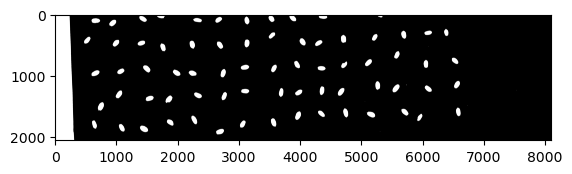

Creating images: 100%|█████████████████████████████████████████████████████████████████| 73/73 [00:10<00:00,  7.21it/s]


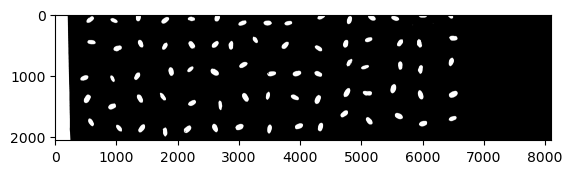

Creating images: 100%|█████████████████████████████████████████████████████████████████| 75/75 [00:07<00:00,  9.46it/s]


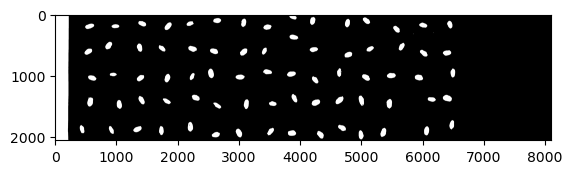

Creating images: 100%|█████████████████████████████████████████████████████████████████| 75/75 [00:11<00:00,  6.77it/s]


In [18]:
from crop_img import crop_image, crop_all_images
from utils import read_all_annot_csv
img_dir = "img/large/"


#Découpage des images et création d'un fichier csv par image récapitulant les annotations et les positions des grains

#Pour images RGB
out_dir = "img/cropped/RGB/"
crop_all_images(path_img = img_dir, path_out = out_dir, path_defauts = "img/liste_defauts_grains.csv", 
                bands = [22, 53, 89], crop_idx_dim1=1300, apply_mask=True, force_creation=True, verbose=False)

#Pour les 216 bandes
out_dir = "img/cropped/216_bands/"
crop_all_images(path_img = img_dir, path_out = out_dir, path_defauts = "img/liste_defauts_grains.csv", 
                bands = [i for i in range(216)], crop_idx_dim1=1300, apply_mask=True, force_creation=True, verbose=False)

#Remet au bon format les csv crées
read_all_annot_csv(annot_dir = "img/cropped/", out_fn='full_set', clean=True)

# Mélange du jeu de données

In [3]:
annot_dir = 'img/cropped/RGB/'         #Dossier où l'on souhaite enregistrer nos jeux de train, test, validation

#annot_dir = 'img/cropped/216_bands/'

In [4]:
#Mélange classique : 70% des données dans le jeu d'entraînement, 15% en validation, 15% en test

shuffle_train_val_test(annot_dir = annot_dir, prop=[0.7, 0.15, 0.15])

EmptyDataError: No columns to parse from file

In [ ]:
"""
Sélectionne une espèce et la garde pour le jeu de test ; les autres sont aléatoirement reparties entre train et val
Possibilité de choisir l'espèce à exclure (paramètre 'spec_test'). Si non précisé, espèce choisie au hasard
"""

shuffle_leave_one_out(annot_dir = 'img/', prop=[0.8, 0.2], spec_test = 3)

# Classification

False
Variétés que l'on va chercher à différencier : 1, 8
cpu
Nubmer of trainables parameters :308354

Training model

Epoch 1
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697833 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.685575

Epoch 2
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697671 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.685713

Epoch 3
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697513 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.685854

Epoch 4
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697405 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.685990

Epoch 5
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697306 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686113

Epoch 6
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.697208 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686242

Epoch 7
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696983 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686374

Epoch 8
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696932 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686499

Epoch 9
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696826 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686640

Epoch 10
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696676 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.686808

Epoch 11
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696554 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.687001

Epoch 12
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696483 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.687211

Epoch 13
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695940 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.687452

Epoch 14
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.696096 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.687703


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 15
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695831 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.687927


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 16
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695555 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.688185

Epoch 17
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695542 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.688489

Epoch 18
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695417 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.688808

Epoch 19
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.694770 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.689170

Epoch 20
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.695193 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.689549

Epoch 21
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.694671 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.689943

Epoch 22
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.693918 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.690402

Epoch 23
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.693905 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.690950

Epoch 24
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        52
           1       0.00      0.00      0.00        56

    accuracy                           0.48       108
   macro avg       0.24      0.50      0.33       108
weighted avg       0.23      0.48      0.31       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 48.1% 	 Avg loss Train: 0.693055 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.691643

Epoch 25
-------------------------------
              precision    recall  f1-score   support

           0       0.49      0.94      0.64        52
           1       0.62      0.09      0.16        56

    accuracy                           0.50       108
   macro avg       0.56      0.52      0.40       108
weighted avg       0.56      0.50      0.39       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       0.00      0.00      0.00        10

    accuracy                           0.58        24
   macro avg       0.29      0.50      0.37        24
weighted avg       0.34      0.58      0.43        24

Results : 	 Accuracy Train: 50.0% 	 Avg loss Train: 0.693683 	 Accuracy Validation: 58.3% 	 Avg loss Validation: 0.692491

Epoch 26
-------------------------------
              precision    recall  f1-score   support

           0       0.48      0.60      0.53        52
           1       0.52      0.41      0.46        56

    accuracy                           0.50       108
   macro avg       0.50      0.50      0.50       108
weighted avg       0.50      0.50      0.50       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 50.0% 	 Avg loss Train: 0.693839 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.693276

Epoch 27
-------------------------------
              precision    recall  f1-score   support

           0       0.57      0.33      0.41        52
           1       0.55      0.77      0.64        56

    accuracy                           0.56       108
   macro avg       0.56      0.55      0.53       108
weighted avg       0.56      0.56      0.53       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 55.6% 	 Avg loss Train: 0.692246 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.694062

Epoch 28
-------------------------------
              precision    recall  f1-score   support

           0       0.55      0.12      0.19        52
           1       0.53      0.91      0.67        56

    accuracy                           0.53       108
   macro avg       0.54      0.51      0.43       108
weighted avg       0.54      0.53      0.44       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 52.8% 	 Avg loss Train: 0.692155 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.694840

Epoch 29
-------------------------------
              precision    recall  f1-score   support

           0       0.78      0.13      0.23        52
           1       0.55      0.96      0.70        56

    accuracy                           0.56       108
   macro avg       0.66      0.55      0.46       108
weighted avg       0.66      0.56      0.47       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 56.5% 	 Avg loss Train: 0.691618 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.695608

Epoch 30
-------------------------------
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        52
           1       0.52      0.98      0.68        56

    accuracy                           0.52       108
   macro avg       0.51      0.50      0.36       108
weighted avg       0.51      0.52      0.37       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.02      0.04        52
           1       0.52      0.98      0.68        56

    accuracy                           0.52       108
   macro avg       0.51      0.50      0.36       108
weighted avg       0.51      0.52      0.37       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 51.9% 	 Avg loss Train: 0.690839 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.697058

Epoch 32
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.52      1.00      0.68        56

    accuracy                           0.52       108
   macro avg       0.26      0.50      0.34       108
weighted avg       0.27      0.52      0.35       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 51.9% 	 Avg loss Train: 0.689445 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.697532

Epoch 33
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.52      1.00      0.68        56

    accuracy                           0.52       108
   macro avg       0.26      0.50      0.34       108
weighted avg       0.27      0.52      0.35       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 51.9% 	 Avg loss Train: 0.690463 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.697753

Epoch 34
-------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.51      0.98      0.67        56

    accuracy      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results : 	 Accuracy Train: 50.9% 	 Avg loss Train: 0.690432 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.697706

Epoch 35
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        52
           1       0.53      1.00      0.69        56

    accuracy                           0.54       108
   macro avg       0.76      0.52      0.38       108
weighted avg       0.76      0.54      0.39       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 53.7% 	 Avg loss Train: 0.690425 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.697241

Epoch 36
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.52      1.00      0.68        56

    accuracy                           0.52       108
   macro avg       0.26      0.50      0.34       108
weighted avg       0.27      0.52      0.35       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 51.9% 	 Avg loss Train: 0.689311 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.696294

Epoch 37
-------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.51      0.98      0.67        56

    accuracy                           0.51       108
   macro avg       0.26      0.49      0.34       108
weighted avg       0.27      0.51      0.35       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.02      0.04        52
           1       0.52      1.00      0.69        56

    accuracy                           0.53       108
   macro avg       0.76      0.51      0.36       108
weighted avg       0.75      0.53      0.37       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 52.8% 	 Avg loss Train: 0.686685 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.694122

Epoch 39
-------------------------------


/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.52      1.00      0.68        56

    accuracy                           0.52       108
   macro avg       0.26      0.50      0.34       108
weighted avg       0.27      0.52      0.35       108



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy                           0.42        24
   macro avg       0.21      0.50      0.29        24
weighted avg       0.17      0.42      0.25        24

Results : 	 Accuracy Train: 51.9% 	 Avg loss Train: 0.687112 	 Accuracy Validation: 41.7% 	 Avg loss Validation: 0.692753

Epoch 40
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        52
           1       0.53      1.00      0.69        56

    accuracy                           0.54       108
   macro avg       0.76      0.52      0.38       108
weighted avg       0.76      0.54      0.39       108

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.42      1.00      0.59        10

    accuracy      

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.10      0.18        52
           1       0.54      1.00      0.70        56

    accuracy                           0.56       108
   macro avg       0.77      0.55      0.44       108
weighted avg       0.76      0.56      0.45       108

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.43      1.00      0.61        10

    accuracy                           0.46        24
   macro avg       0.72      0.54      0.37        24
weighted avg       0.76      0.46      0.33        24

Results : 	 Accuracy Train: 56.5% 	 Avg loss Train: 0.683849 	 Accuracy Validation: 45.8% 	 Avg loss Validation: 0.690228

Epoch 42
-------------------------------
              precision    recall  f1-score   support

           0       0.80      0.23      0.36        52
           1       0.57      0.95      0.71        56

    accuracy      

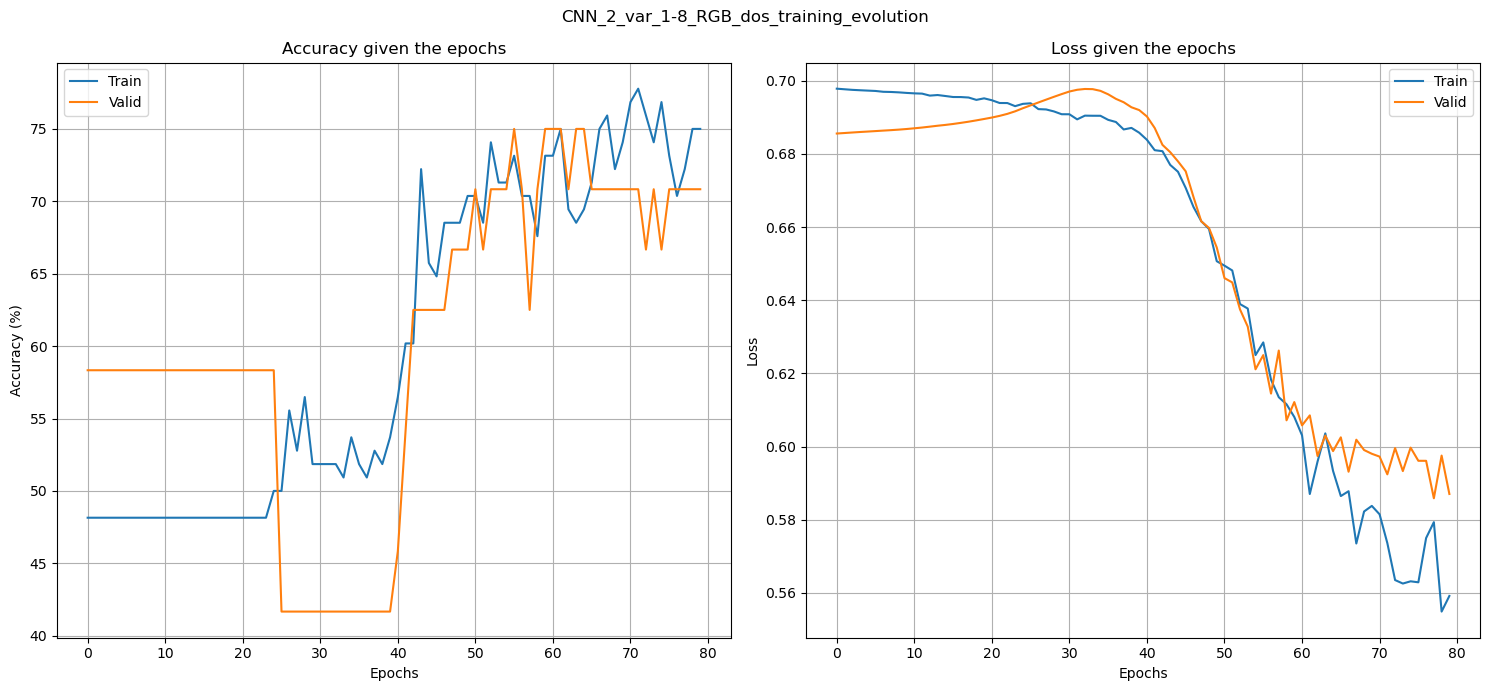


Testing model
Test : 
 Accuracy: 65.4% 	 Avg loss: 0.628865 

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.59      0.83      0.69        12

    accuracy                           0.65        26
   macro avg       0.68      0.67      0.65        26
weighted avg       0.69      0.65      0.65        26


Saving values of train, validation and test loops

Done!


In [17]:
from classification_face import *
learning_rate = 1e-4
epochs = 80
"""
Exemple : Classification d'espèces (espèces 3 et 7 uniquement) en utilisant que les images RBG, sur les grains de dos 
uniquement, en excluant les grains autres
"""

weights_loss = [2., 2.]                #Liste nécessairement de la même taille que le nombre de classes sur lequel on s'entraîne
model_name = 'CNN_2_var_1-8_RGB_dos'   #Attention : Si un modèle existe déjà sous ce nom là, il sera remplacé


main_loop(annot_dir = annot_dir, cnn = CNN_2, model_fn = model_name, labels_type = 'Species', 
              weights_loss = weights_loss, learning_rate = learning_rate, epochs=epochs, 
              batch_size=32, other_class = False, chosen_var = [3, 7], chosen_face = 'Dos'
          )

"""
Exemple : Classification de faces en utilisant que les images RBG, sur les grains de dos 
uniquement, en excluant les grains autres
"""

weights_loss = [2., 2., 2.]            
model_name = 'CNN_3_all_classes_216_bands'   #Attention : Si un modèle existe déjà sous ce nom là, il sera remplacé


main_loop(annot_dir = annot_dir, cnn = CNN_3, model_fn = model_name, labels_type = 'Face', 
              weights_loss = weights_loss, learning_rate = learning_rate, epochs=epochs, 
              batch_size=32, other_class = True
          )

#### Cross validation

In [ ]:
annot_dir = "img/cropped/RGB/"
cnn = CNN_3
model_fn = "CNN_3_cross_validation"
learning_rate = 1e-4
epochs = 80
labels_type = "Face"
weights_loss = [2., 2.]
batch_size = 64
other_class = False
K=5

cross_validation(cross_validation(
    annot_dir=annot_dir,
    cnn=cnn,
    model_fn=model_fn,
    labels_type=labels_type,
    weights_loss=weights_loss,
    learning_rate=learning_rate,
    epochs=epochs,
    batch_size=batch_size,
    other_class = other_class,
    K=K))

# Tests et reconstitution des macro images

#### Test d'un modèle existant sur un jeu d'images annotées

In [21]:
model_testing(model_fn = 'CNN_2_RGB', annot_dir = 'img/cropped/RGB/', test_annot_fn = 'test_set', labels_type = 'Face')

"""
Par défaut, on considère que le modèle ne prend pas en compte la classe autre. Sinon, il faut rajouter en paramètre
other_class = False. 

De même, si le modèle classifie les espèces, on doit rajouter les variables chosen_vspecies et éventuellement chosen_face
Exemple : model_testing(model_fn = 'modèle_quelconque', annot_dir = 'img/cropped/RGB/', test_annot_fn = 'test_set', 
                                labels_type = 'Species', chosen_species = [1, 4], chosen_face = 'Sillon')
"""

FileNotFoundError: [Errno 2] No such file or directory: 'img/cropped/RGB/test_set.csv'

#### Reconstitution d'images avec prédictions

In [ ]:
reconstitute_img(annot_dir_test_preds = "models/CNN_2_RGB/", annot_path_test_preds = "test_preds", img_folder = "img/")

In [1]:
from utils import reconstitute_img, see_all_img, get_metrics
import numpy as np
import matplotlib.patches as patches

In [ ]:
see_all_img(annot_dir = "img/cropped/RGB/", annot_path = "full_set", img_folder = "img/", preds = False)

In [ ]:
see_all_img(annot_dir = "models/CNN_2_var_1-8_RGB/", annot_path = "test_preds", labels_type = 'Species',
            img_folder = "img/", preds = True)

In [19]:
get_metrics('models/CNN_2_2/', 'test_preds')